## INFO 6105 Homework 3

### Melatonin Products Market Analysis

### Name: Akshita Ishvarbhai Barot

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud

In [2]:
# Loading Dataframes

# Kids folder files

zarbee_kids = pd.read_csv(f"B01MAWIGWT_Zarbee'sKids1mgMelatoninGummy.csv")
natrol_kids = pd.read_csv(f"B07VMJMZNP_NatrolKidsMelatoninGummy.csv")

# Adults folder files

vitaf_adult = pd.read_csv(f'B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements.csv')
puri_adult= pd.read_csv(f"B00K8K937I_Puritan'sPrideSuperStrengthRapidReleaseCapsules Melatonin.csv")
carly_adult300 = pd.read_csv(f"B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets.csv")
carly_adult180 = pd.read_csv(f"B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets.csv")
natrol_adult= pd.read_csv(f"B079TD7HG2_NatrolMelatoninSleepAidGummy.csv")
vitam_adult= pd.read_csv(f"B08CGYFB2Q_VitamaticMelatonin20mgTablets.csv")
zquil_adult= pd.read_csv(f"B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies.csv")

### Data Exploration

In [3]:
zarbee_kids.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Christina Majors,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,The berry flavor is awful. My children will no...,NaN,Berry flavor is bad,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R2B...,B01MAWIGWT
1,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Amazon Customer,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,My kids (7 yr old twins) were not falling asle...,NaN,Works- update at bottom,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/RW6...,B01MAWIGWT
2,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Juan,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,First of all I’m a teen I have problems sleepi...,NaN,Best natural sleeping gummy,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R3V...,B01MAWIGWT
3,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Amazon Customer,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,I give these gummies to my 5 and 8-year-olds a...,NaN,"Safe, effective gummy to help with sleep...",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R26...,B01MAWIGWT
4,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Darren S.,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,Works Great! Helps my 3 year old calm down at ...,NaN,Works great!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R1J...,B01MAWIGWT


In [4]:
natrol_kids.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,scarlet,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,"Encantada, funcionan perfectamente para ayudar...",NaN,Excelente,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R1N...,B07VMJMZNP
1,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Dallin,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,This is the only melatonin candy our daughter ...,NaN,THIS WORKS!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R2D...,B07VMJMZNP
2,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Plinio,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,I don’t usually write reviews unless I am wowe...,NaN,Wow! Works like a charm!,3.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/RJA...,B07VMJMZNP
3,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,L. K. Kendall,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,Terrific product!,NaN,Wonderful,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R3P...,B07VMJMZNP
4,B07VMJMZNP,"Natrol Kids Melatonin Gummy, 1mg, Sleep Aid Su...",4.8,891,Amazon Customer,NaN,Verified Purchase,Style: Sleep Aid,B07VMJMZNP,https://www.amazon.com/Natrol-Melatonin-Gummie...,...,United States,"We don't use them every night, but my kids wil...",NaN,"Kids eat them, they seem to work",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07VMJM...,Natrol,https://www.amazon.com/gp/customer-reviews/R2W...,B07VMJMZNP


In [5]:
vitaf_adult.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,R+SFly,NaN,Verified Purchase,Size: 120 Count (Pack of 1) | Style: Extra Str...,B00OJMZSWU,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,Easy to take and use. I bought these because t...,NaN,Quick and easy,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/R2C...,B07PF1SN5B
1,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,Grammy Sammie,NaN,Verified Purchase,Size: 120 Count (Pack of 1) | Style: Extra Str...,B00OJMZSWU,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,Love these. Great flavor and tasty.,NaN,The best gummies,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/R13...,B07PF1SN5B
2,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,Ayasha,NaN,Verified Purchase,Size: 100 Count (Pack of 1) | Style: Max Strength,B07PF1SN5B,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,I love these sleepy times gummies! They work e...,NaN,Great taste,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/RLN...,B07PF1SN5B
3,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,escox3,NaN,Verified Purchase,Size: 100 Count (Pack of 1) | Style: Max Strength,B07PF1SN5B,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,These things are ridiculously hard to chew. Th...,NaN,Hard to Chew,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/R2N...,B07PF1SN5B
4,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,MissJess,NaN,Verified Purchase,Size: 120 Count (Pack of 1) | Style: Extra Str...,B00OJMZSWU,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,Mine were all stuck together in one big blob. ...,NaN,Mine were melted together,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/R3I...,B07PF1SN5B


In [6]:
puri_adult.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I


In [7]:
carly_adult300.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Jay,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,Product works as described. Simply hold inter ...,NaN,Works,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R18...,B08451719W
1,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Esc Go,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,La compre porque investigue y concluí que era ...,NaN,Buen sabor.,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R24...,B08451719W
2,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Dawn Wilson,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,"Flavor is good, not chalky! Easily dissolve",NaN,Good product,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/ROA...,B08451719W
3,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Margaret hodgson,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,Works really well just taste really gross,NaN,The taste,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R4T...,B08451719W
4,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Troy Acton,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,Thank You,NaN,Thank You,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2D...,B08451719W


In [8]:
carly_adult180.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B07GR9WBFY,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,6594,Charma,NaN,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,United States,Wish I would have known about the artificial s...,NaN,Taste awful! Nasty after taste!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07GR9W...,Carlyle,https://www.amazon.com/gp/customer-reviews/R1I...,B07GR9WBFY
1,B07GR9WBFY,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,6594,Clint,NaN,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,United States,Work well. Usually put me out about an hour af...,NaN,Works great,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07GR9W...,Carlyle,https://www.amazon.com/gp/customer-reviews/R16...,B07GR9WBFY
2,B07GR9WBFY,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,6594,GRACE AVENA,NaN,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,United States,Works fast,NaN,Works fast,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07GR9W...,Carlyle,https://www.amazon.com/gp/customer-reviews/R32...,B07GR9WBFY
3,B07GR9WBFY,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,6594,Diego Castro,NaN,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,United States,Excellent for sleeping,NaN,Very useful,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07GR9W...,Carlyle,https://www.amazon.com/gp/customer-reviews/R4P...,B07GR9WBFY
4,B07GR9WBFY,Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...,4.5,6594,Virginia Marks,NaN,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,United States,I like melatonin because it is a natural way t...,NaN,Carlye Melatoin,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07GR9W...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2C...,B07GR9WBFY


In [9]:
natrol_adult.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B079TD7HG2,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,Emily Hatley,NaN,Verified Purchase,Style: 10mg | Size: 90 Count (Pack of 1),B079TD7HG2,https://www.amazon.com/Natrol-Melatonin-10Mg-G...,...,United States,I’m disappointed in the quality of this produc...,NaN,Not so much,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B079TD7...,Natrol,https://www.amazon.com/gp/customer-reviews/R23...,B079TD7HG2
1,B079TD7HG2,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,Stacy Lynn,NaN,NaN,Style: 10mg | Size: 90 Count (Pack of 1),B079TD7HG2,https://www.amazon.com/Natrol-Melatonin-10Mg-G...,...,United States,These are the best tasteing and working onez i...,NaN,There great,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B079TD7...,Natrol,https://www.amazon.com/gp/customer-reviews/R3Q...,B079TD7HG2
2,B079TD7HG2,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,Anthony,NaN,Verified Purchase,Style: 10mg | Size: 90 Count (Pack of 1),B079TD7HG2,https://www.amazon.com/Natrol-Melatonin-10Mg-G...,...,United States,"Best on the market, could be cheaper but I’m f...",NaN,Best brand,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B079TD7...,Natrol,https://www.amazon.com/gp/customer-reviews/RK8...,B079TD7HG2
3,B079TD7HG2,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,Jo Reader,NaN,Verified Purchase,Style: 10mg | Size: 140 Count (Pack of 1),B08666GMWG,https://www.amazon.com/Natrol-Melatonin-10Mg-G...,...,United States,Flavor palatable but kinda flat; definitely no...,NaN,Good price for the quality and quantity of 10mg.,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B079TD7...,Natrol,https://www.amazon.com/gp/customer-reviews/R2R...,B079TD7HG2
4,B079TD7HG2,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,Rocio K Rivas,NaN,Verified Purchase,Style: 10mg | Size: 140 Count (Pack of 1),B08666GMWG,https://www.amazon.com/Natrol-Melatonin-10Mg-G...,...,United States,"They are actually 5 mg, you have to take 2 gum...",NaN,NOT 10 mg,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B079TD7...,Natrol,https://www.amazon.com/gp/customer-reviews/R1E...,B079TD7HG2


In [10]:
vitam_adult.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Elaine L. Parsons,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B08CSYJ3FZ,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,20mg in one pill/dose. Easy to swallow. Grape ...,NaN,Right dose,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/R1R...,B08CGYFB2Q
1,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Garou,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B08CGYFB2Q,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,Sleep aid,NaN,It works as advertized.,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/RSG...,B08CGYFB2Q
2,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,Lila Cossey,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B08CGYFB2Q,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,Me and my husband have been taking this for aw...,NaN,Good Sleep!!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/RF1...,B08CGYFB2Q
3,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,duff,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,product works as advertised,NaN,works,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/R1L...,B08CGYFB2Q
4,B08CGYFB2Q,"Vitamatic Melatonin 20mg Tablets | Vegetarian,...",4.5,1033,jon,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B08CGYFB2Q,https://www.amazon.com/Vitamatic-Melatonin-Tab...,...,United States,Works great with no after taste,NaN,Works great no after taste,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B08CGYF...,Vitamatic,https://www.amazon.com/gp/customer-reviews/R3A...,B08CGYFB2Q


In [11]:
zquil_adult.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B07N46LTJJ,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,Erin,NaN,NaN,NaN,NaN,NaN,...,United States,I managed to force down a couple of gummies an...,NaN,Bad taste,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07N46L...,ZzzQuil,https://www.amazon.com/gp/customer-reviews/RCX...,B07N46LTJJ
1,B07N46LTJJ,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,A Customer,VINE VOICE,Verified Purchase,NaN,NaN,NaN,...,United States,I’ve heard so many good things about this prod...,NaN,"Works for my sister, but not for me. Plus it c...",9.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07N46L...,ZzzQuil,https://www.amazon.com/gp/customer-reviews/R3U...,B07N46LTJJ
2,B07N46LTJJ,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,Grandma Melinda,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,"The first ingredients are ""Corn syrup, water a...",NaN,Sickeningly sweet - loaded with sugar,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07N46L...,ZzzQuil,https://www.amazon.com/gp/customer-reviews/R2N...,B07N46LTJJ
3,B07N46LTJJ,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,Judy,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,Product works! End up getting sleepy like boo ...,NaN,Actually works!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07N46L...,ZzzQuil,https://www.amazon.com/gp/customer-reviews/R1H...,B07N46LTJJ
4,B07N46LTJJ,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,nancy garris,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,You go to sleep very quickly!,NaN,Works great,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07N46L...,ZzzQuil,https://www.amazon.com/gp/customer-reviews/R3K...,B07N46LTJJ


In [12]:
# Concating the csv files into two dataframe - kids and adults

kids_df = pd.concat([zarbee_kids,natrol_kids])
adult_df = pd.concat([vitaf_adult,puri_adult,carly_adult300,carly_adult180,natrol_adult,vitaf_adult,zquil_adult])

In [13]:
kids_df.shape

(4140, 22)

In [14]:
kids_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 889
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   asin                          4140 non-null   object 
 1   product_title                 4140 non-null   object 
 2   average_rating                4140 non-null   float64
 3   total_reviews                 4140 non-null   int64  
 4   review_author                 4140 non-null   object 
 5   author_badge                  14 non-null     object 
 6   badge                         3985 non-null   object 
 7   reviewed_product_attribute    4138 non-null   object 
 8   reviewed_variant_asin         4138 non-null   object 
 9   variant_review_url            4138 non-null   object 
 10  review_rating                 4140 non-null   float64
 11  review_date                   4140 non-null   object 
 12  reviewed_country              4140 non-null   object 
 13  revi

In [15]:
kids_df.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Christina Majors,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,The berry flavor is awful. My children will no...,NaN,Berry flavor is bad,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R2B...,B01MAWIGWT
1,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Amazon Customer,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,My kids (7 yr old twins) were not falling asle...,NaN,Works- update at bottom,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/RW6...,B01MAWIGWT
2,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Juan,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,First of all I’m a teen I have problems sleepi...,NaN,Best natural sleeping gummy,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R3V...,B01MAWIGWT
3,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Amazon Customer,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,I give these gummies to my 5 and 8-year-olds a...,NaN,"Safe, effective gummy to help with sleep...",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R26...,B01MAWIGWT
4,B01MAWIGWT,"Zarbee's Kids 1mg Melatonin Gummy, Drug-Free &...",4.7,3256,Darren S.,NaN,Verified Purchase,"Style: Kids Bedtime Melatonin Gummies, 50ct",B01MAWIGWT,https://www.amazon.com/Zarbees-Naturals-Childr...,...,United States,Works Great! Helps my 3 year old calm down at ...,NaN,Works great!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,Zarbee's,https://www.amazon.com/gp/customer-reviews/R1J...,B01MAWIGWT


In [16]:
adult_df.shape

(16860, 22)

In [17]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 1299
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   asin                          16860 non-null  object 
 1   product_title                 16860 non-null  object 
 2   average_rating                16860 non-null  float64
 3   total_reviews                 16860 non-null  int64  
 4   review_author                 16860 non-null  object 
 5   author_badge                  115 non-null    object 
 6   badge                         16560 non-null  object 
 7   reviewed_product_attribute    14794 non-null  object 
 8   reviewed_variant_asin         14794 non-null  object 
 9   variant_review_url            14794 non-null  object 
 10  review_rating                 16860 non-null  float64
 11  review_date                   16860 non-null  object 
 12  reviewed_country              16860 non-null  object 
 13  re

In [18]:
adult_df.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,R+SFly,NaN,Verified Purchase,Size: 120 Count (Pack of 1) | Style: Extra Str...,B00OJMZSWU,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,Easy to take and use. I bought these because t...,NaN,Quick and easy,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/R2C...,B07PF1SN5B
1,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,Grammy Sammie,NaN,Verified Purchase,Size: 120 Count (Pack of 1) | Style: Extra Str...,B00OJMZSWU,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,Love these. Great flavor and tasty.,NaN,The best gummies,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/R13...,B07PF1SN5B
2,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,Ayasha,NaN,Verified Purchase,Size: 100 Count (Pack of 1) | Style: Max Strength,B07PF1SN5B,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,I love these sleepy times gummies! They work e...,NaN,Great taste,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/RLN...,B07PF1SN5B
3,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,escox3,NaN,Verified Purchase,Size: 100 Count (Pack of 1) | Style: Max Strength,B07PF1SN5B,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,These things are ridiculously hard to chew. Th...,NaN,Hard to Chew,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/R2N...,B07PF1SN5B
4,B07PF1SN5B,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,MissJess,NaN,Verified Purchase,Size: 120 Count (Pack of 1) | Style: Extra Str...,B00OJMZSWU,https://www.amazon.com/Vitafusion-Strength-Mel...,...,United States,Mine were all stuck together in one big blob. ...,NaN,Mine were melted together,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,Vitafusion,https://www.amazon.com/gp/customer-reviews/R3I...,B07PF1SN5B


In [19]:
# Checking for null values in kids dataframe
kids_df.isnull().sum()

asin                               0
product_title                      0
average_rating                     0
total_reviews                      0
review_author                      0
author_badge                    4126
badge                            155
reviewed_product_attribute         2
reviewed_variant_asin              2
variant_review_url                 2
review_rating                      0
review_date                        0
reviewed_country                   0
review_text                        3
review_comment_count            4140
review_header                      0
no_of_people_reacted_helpful    3549
author_profile_url                 0
url                                0
brand                              0
review_url                         0
input                              0
dtype: int64

In [20]:
# Checking for null values in adults dataframe
adult_df.isnull().sum()

asin                                0
product_title                       0
average_rating                      0
total_reviews                       0
review_author                       0
author_badge                    16745
badge                             300
reviewed_product_attribute       2066
reviewed_variant_asin            2066
variant_review_url               2066
review_rating                       0
review_date                         0
reviewed_country                    0
review_text                        27
review_comment_count            16860
review_header                       4
no_of_people_reacted_helpful    13913
author_profile_url                  0
url                                 0
brand                               0
review_url                          0
input                               0
dtype: int64

In [21]:
# Checking for duplicates in kids dataframe
kids_df.duplicated().sum()

0

In [22]:
# Checking for duplicates in adults dataframe
adult_df.duplicated().sum()

1950

In [23]:
# Reseting the index 

kids_df = kids_df.reset_index(drop=True)
adult_df = adult_df.reset_index(drop=True)

In [24]:
kids_df_copy = kids_df.copy()
adult_df_copy = adult_df.copy()

### Data Cleaning

In [25]:
# Filling columns with missing values

kids_df_copy['review_text'] = kids_df_copy['review_text'].fillna('No reviews')
kids_df_copy['author_badge'] = kids_df_copy['author_badge'].fillna('Unknown')
kids_df_copy['no_of_people_reacted_helpful'] = kids_df_copy['no_of_people_reacted_helpful'].fillna(0)

adult_df_copy['review_text'] = adult_df_copy['review_text'].fillna('No reviews')
adult_df_copy['author_badge'] = adult_df_copy['author_badge'].fillna('Unknown')
adult_df_copy['no_of_people_reacted_helpful'] = adult_df_copy['no_of_people_reacted_helpful'].fillna(0)

In [26]:
# Dropping columns with missing values
kids_df_copy = kids_df_copy.drop('review_comment_count', axis = 1)
adult_df_copy = adult_df_copy.drop('review_comment_count', axis = 1)

In [27]:
# Converting columns with object type to datetime
kids_df_copy['review_date'] = pd.to_datetime(kids_df_copy['review_date'])
adult_df_copy['review_date'] = pd.to_datetime(adult_df_copy['review_date'])


In [28]:
# Removing non-alphanumeric characters from the review text
kids_df_copy['review_text'] = kids_df_copy['review_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
adult_df_copy['review_text'] = adult_df_copy['review_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [29]:
# Converting categorical variables to lower case
cat_cols = ['product_title', 'review_author', 'badge', 'reviewed_product_attribute', 'reviewed_variant_asin',
            'reviewed_country', 'review_header', 'brand']
kids_df_copy[cat_cols] = kids_df_copy[cat_cols].apply(lambda x: x.str.lower())
cat_cols1 = ['product_title', 'review_author', 'badge', 'reviewed_product_attribute', 'reviewed_variant_asin',
            'reviewed_country', 'review_header', 'brand']
adult_df_copy[cat_cols1] = adult_df_copy[cat_cols1].apply(lambda x: x.str.lower())

In [30]:
kids_df_copy.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_date,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,christina majors,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,2020-10-29,united states,The berry flavor is awful My children will not...,berry flavor is bad,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R2B...,B01MAWIGWT
1,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,amazon customer,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,2021-08-23,united states,My kids 7 yr old twins were not falling asleep...,works- update at bottom,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/RW6...,B01MAWIGWT
2,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,juan,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,2020-12-30,united states,First of all Im a teen I have problems sleepin...,best natural sleeping gummy,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R3V...,B01MAWIGWT
3,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,amazon customer,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,2021-02-06,united states,I give these gummies to my 5 and 8yearolds alo...,"safe, effective gummy to help with sleep...",0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R26...,B01MAWIGWT
4,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,darren s.,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,2019-09-06,united states,Works Great Helps my 3 year old calm down at n...,works great!,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R1J...,B01MAWIGWT


In [31]:
adult_df_copy.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_date,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,r+sfly,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,2017-07-18,united states,Easy to take and use I bought these because th...,quick and easy,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R2C...,B07PF1SN5B
1,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,grammy sammie,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,2022-04-11,united states,Love these Great flavor and tasty,the best gummies,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R13...,B07PF1SN5B
2,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,ayasha,Unknown,verified purchase,size: 100 count (pack of 1) | style: max strength,b07pf1sn5b,https://www.amazon.com/Vitafusion-Strength-Mel...,...,2021-10-12,united states,I love these sleepy times gummies They work ev...,great taste,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/RLN...,B07PF1SN5B
3,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,escox3,Unknown,verified purchase,size: 100 count (pack of 1) | style: max strength,b07pf1sn5b,https://www.amazon.com/Vitafusion-Strength-Mel...,...,2022-06-23,united states,These things are ridiculously hard to chew The...,hard to chew,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R2N...,B07PF1SN5B
4,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,missjess,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,2022-11-18,united states,Mine were all stuck together in one big blob U...,mine were melted together,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R3I...,B07PF1SN5B


### Exploratory Data Analysis

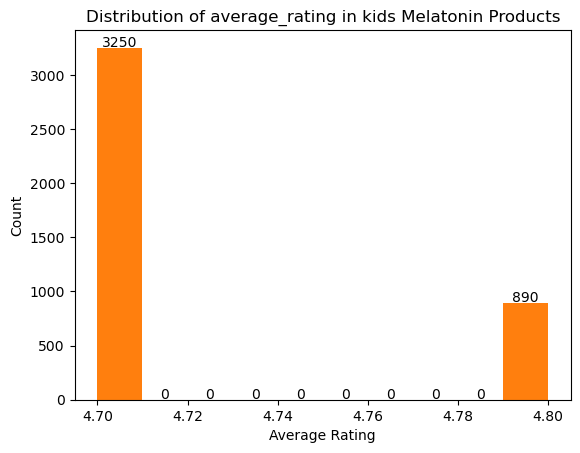

In [32]:
# Plotting distribution of average rating - Kids

plt.hist(kids_df_copy['average_rating'], bins = 10)
plt.title('Distribution of average_rating in kids Melatonin Products')
plt.xlabel('Average Rating')
plt.ylabel('Count')

counts, bins, patches = plt.hist(kids_df_copy['average_rating'], bins=10)
for i, patch in enumerate(patches):
    plt.text(x=patch.get_x() + patch.get_width() / 2, y=counts[i] + 10, s=int(counts[i]), ha='center')
    
plt.show()

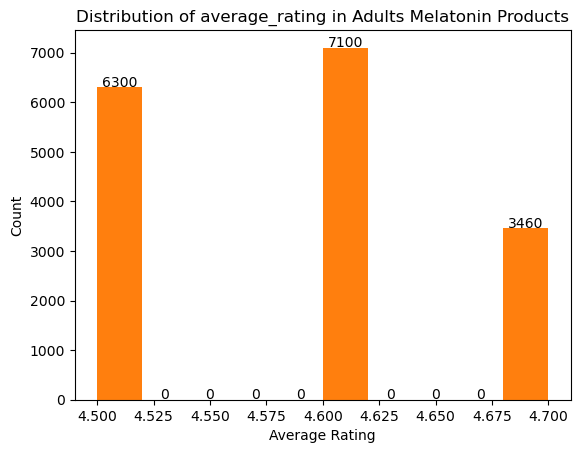

In [33]:
# Plotting distribution of average rating - Adults

plt.hist(adult_df_copy['average_rating'], bins = 10)
plt.title('Distribution of average_rating in Adults Melatonin Products')
plt.xlabel('Average Rating')
plt.ylabel('Count')

counts, bins, patches = plt.hist(adult_df_copy['average_rating'], bins=10)
for i, patch in enumerate(patches):
    plt.text(x=patch.get_x() + patch.get_width() / 2, y=counts[i] + 10, s=int(counts[i]), ha='center')
    
plt.show()

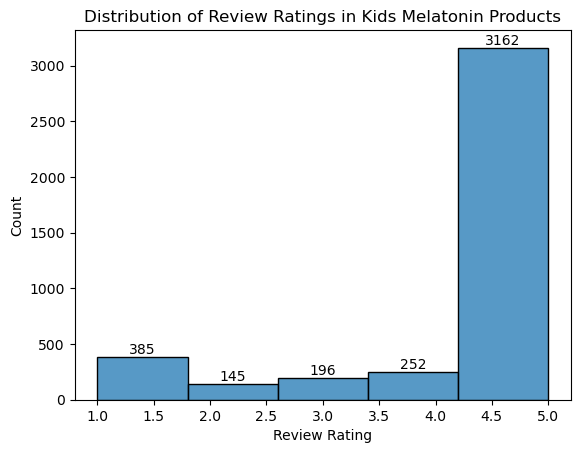

In [34]:
# Plotting distribution for review ratings - Kids

fig, ax = plt.subplots()
sns.histplot(kids_df_copy['review_rating'], bins = 5, ax=ax)
ax.set_title('Distribution of Review Ratings in Kids Melatonin Products')
ax.set_xlabel('Review Rating')
ax.set_ylabel('Count')
for i, rect in enumerate(ax.patches):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), int(rect.get_height()), ha='center', va='bottom')

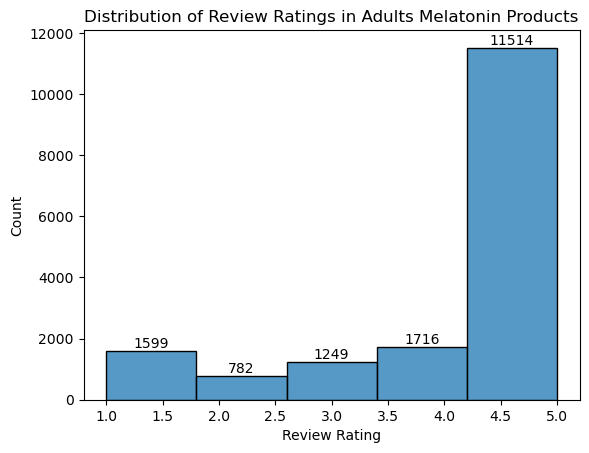

In [35]:
# Plotting distribution for review ratings - Adults

fig, ax = plt.subplots()
sns.histplot(adult_df_copy['review_rating'], bins = 5, ax=ax)
ax.set_title('Distribution of Review Ratings in Adults Melatonin Products')
ax.set_xlabel('Review Rating')
ax.set_ylabel('Count')
for i, rect in enumerate(ax.patches):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), int(rect.get_height()), ha='center', va='bottom')

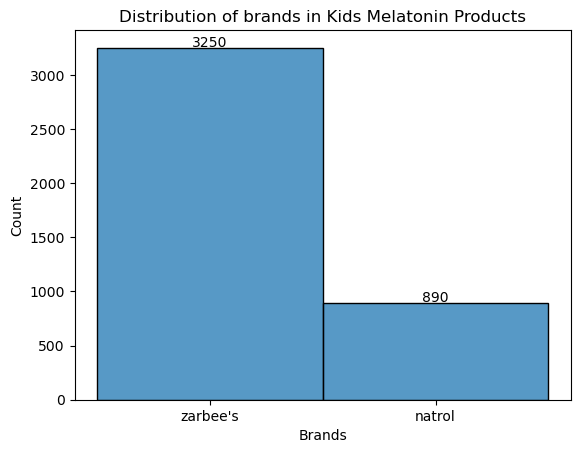

In [36]:
# Plotting distribution for brands -Kids
sns.histplot(kids_df_copy['brand'], binwidth=0.5)
counts = kids_df_copy['brand'].value_counts()
for i, v in counts.items():
    plt.text(i, v+10, str(v), ha='center')
    
plt.title('Distribution of brands in Kids Melatonin Products')
plt.xlabel('Brands')
plt.ylabel('Count')
#plt.xticks(rotation=90)
plt.show()

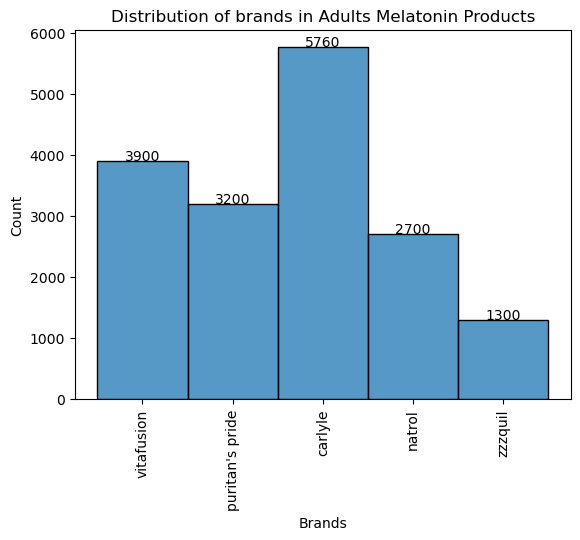

In [37]:
# Plotting distribution for brands -Kids
sns.histplot(adult_df_copy['brand'], binwidth=0.5)
counts = adult_df_copy['brand'].value_counts()
for i, v in counts.items():
    plt.text(i, v+10, str(v), ha='center')
    
plt.title('Distribution of brands in Adults Melatonin Products')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

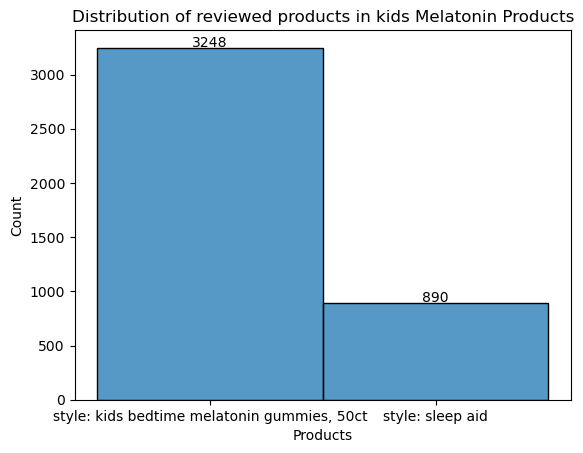

In [38]:
# Plotting distribution for reviewed products -Kids
sns.histplot(kids_df_copy['reviewed_product_attribute'], binwidth=0.5)
counts = kids_df_copy['reviewed_product_attribute'].value_counts()
for i, v in counts.items():
    plt.text(i, v+10, str(v), ha='center')
    
plt.title('Distribution of reviewed products in kids Melatonin Products')
plt.xlabel('Products')
plt.ylabel('Count')
plt.show()

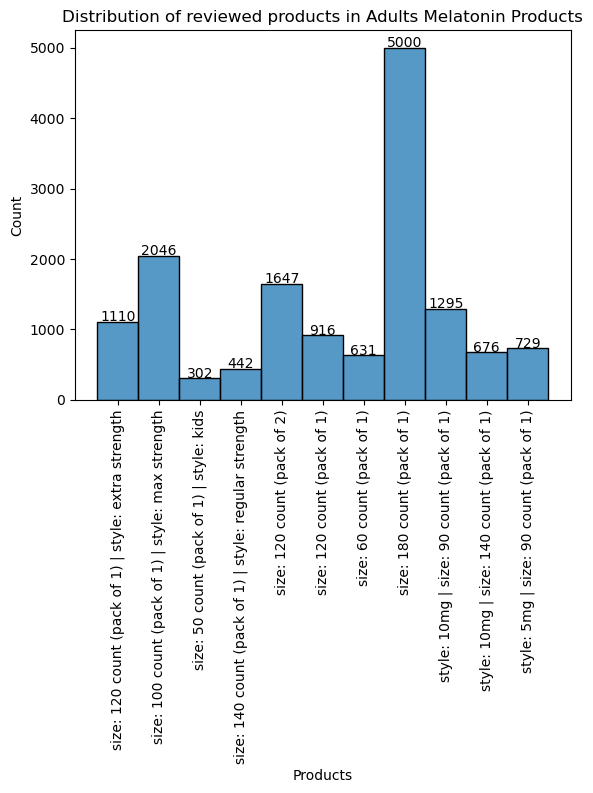

In [39]:
# Plotting distribution for reviewed products -Adults
sns.histplot(adult_df_copy['reviewed_product_attribute'], binwidth=0.5)
counts = adult_df_copy['reviewed_product_attribute'].value_counts()
for i, v in counts.items():
    plt.text(i, v+10, str(v), ha='center')
    
plt.title('Distribution of reviewed products in Adults Melatonin Products')
plt.xlabel('Products')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [40]:
# Createing a regular expression pattern to match dose levels in the product title
pattern = r'(\d+)(?:mg)?'

# Extracting the dose level from the product title and creating the dose column
kids_df_copy['dose'] = kids_df_copy['product_title'].str.extract(pattern, expand=False).fillna(0).astype(int)
adult_df_copy['dose'] = adult_df_copy['product_title'].str.extract(pattern, expand=False).fillna(0).astype(int)

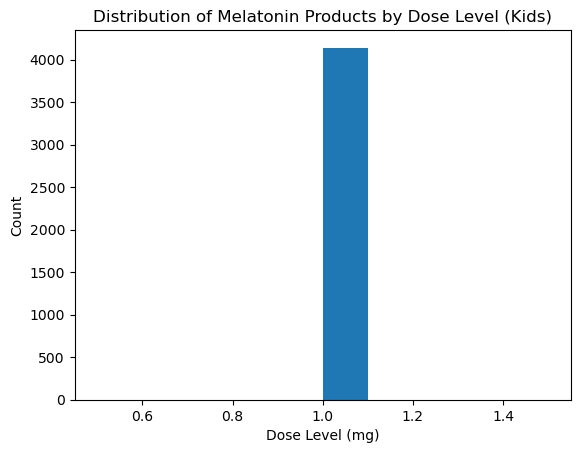

In [41]:
# Plotting distribution of products by dose level - Kids

plt.hist(kids_df_copy['dose'], bins=10)
plt.xlabel('Dose Level (mg)')
plt.ylabel('Count')
plt.title('Distribution of Melatonin Products by Dose Level (Kids)')
plt.show()

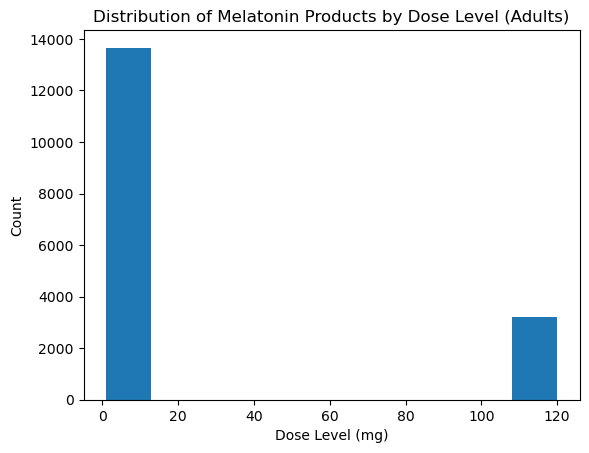

In [42]:
# Plotting distribution of products by dose level - Adults

plt.hist(adult_df_copy['dose'], bins=10)
plt.xlabel('Dose Level (mg)')
plt.ylabel('Count')
plt.title('Distribution of Melatonin Products by Dose Level (Adults)')
plt.show()

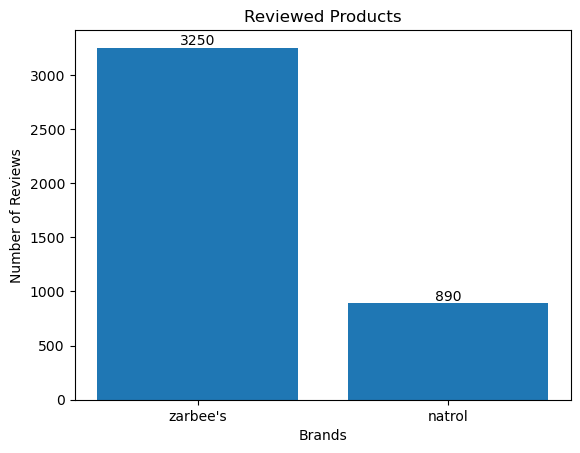

In [43]:
# Creating a bar chart of the most reviewed products as per brands - Kids

top_products = kids_df_copy.groupby('brand').size().sort_values(ascending=False)
plt.bar(top_products.index, top_products.values)
plt.xticks(rotation=0)
plt.title('Reviewed Products')
plt.xlabel('Brands')
plt.ylabel('Number of Reviews')
for i, v in enumerate(top_products.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

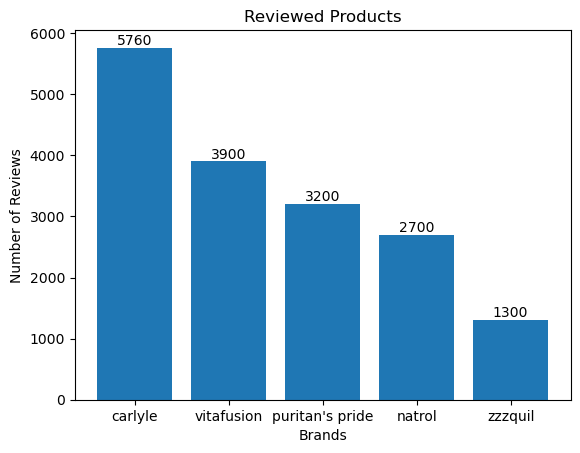

In [44]:
# Creating a bar chart of the most reviewed products as per brands - Adults

top_products = adult_df_copy.groupby('brand').size().sort_values(ascending=False)
plt.bar(top_products.index, top_products.values)
plt.xticks(rotation=0)
plt.title('Reviewed Products')
plt.xlabel('Brands')
plt.ylabel('Number of Reviews')
for i, v in enumerate(top_products.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

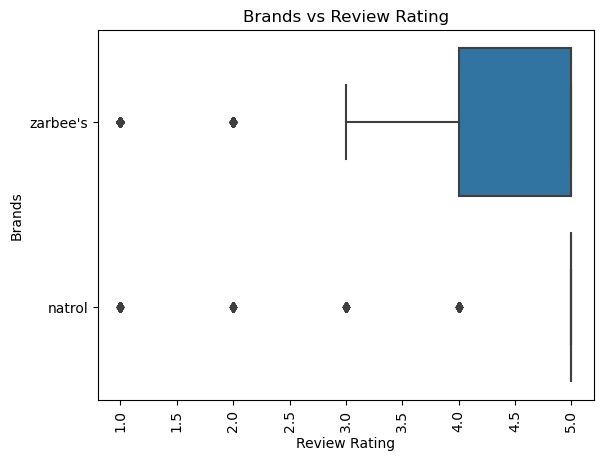

In [45]:
# Plotting the relationship between review ratings and brands - Kids

sns.boxplot(x= 'review_rating', y='brand', data=kids_df_copy)
plt.title('Brands vs Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Brands')
plt.xticks(rotation=90)
plt.show()

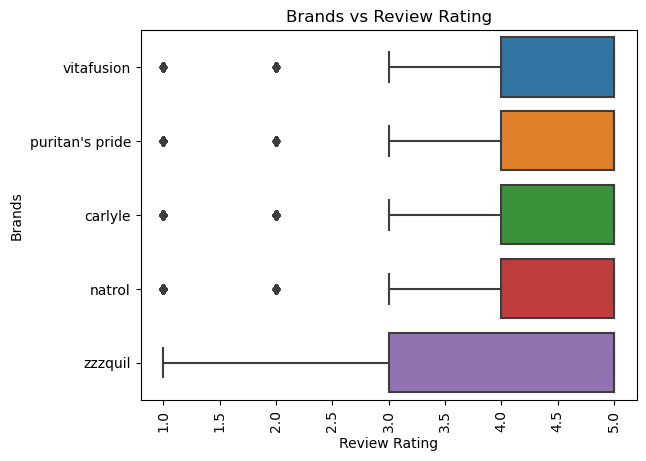

In [46]:
# Plotting the relationship between review ratings and brands - Adults

sns.boxplot(x= 'review_rating', y='brand', data=adult_df_copy)
plt.title('Brands vs Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Brands')
plt.xticks(rotation=90)
plt.show()

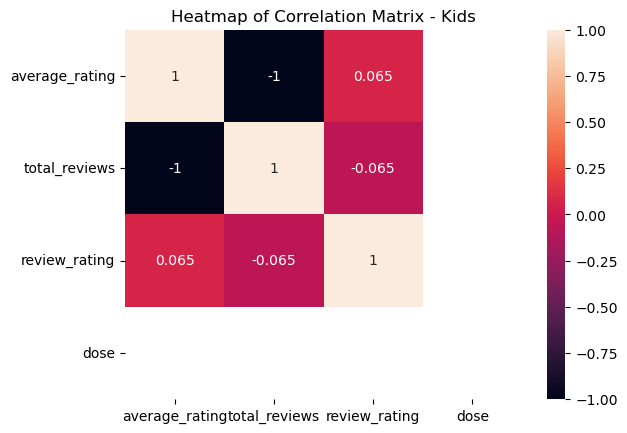

In [47]:
# Selecting numerical features for the correlation matrix - Kids
num_cols = ['average_rating', 'total_reviews', 'review_rating', 'no_of_people_reacted_helpful', 'dose']

# Create a correlation matrix
corr_matrix = kids_df_copy[num_cols].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix - Kids')
plt.show()

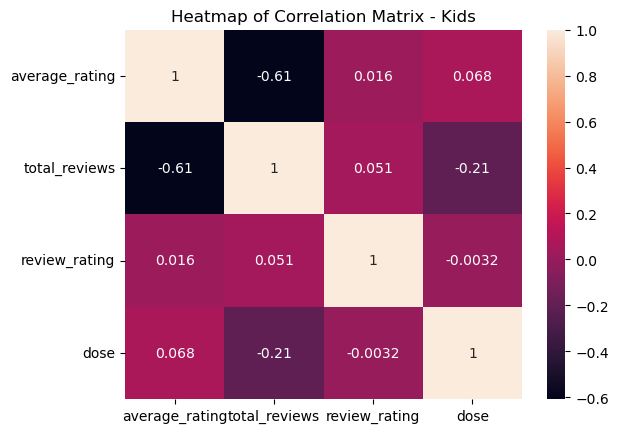

In [48]:
# Selecting numerical features for the correlation matrix - Adults
num_cols = ['average_rating', 'total_reviews', 'review_rating', 'no_of_people_reacted_helpful', 'dose']

# Create a correlation matrix
corr_matrix = adult_df_copy[num_cols].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix - Kids')
plt.show()

In [49]:
kids_df_copy.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,dose
0,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,christina majors,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,united states,The berry flavor is awful My children will not...,berry flavor is bad,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R2B...,B01MAWIGWT,1
1,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,amazon customer,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,united states,My kids 7 yr old twins were not falling asleep...,works- update at bottom,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/RW6...,B01MAWIGWT,1
2,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,juan,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,united states,First of all Im a teen I have problems sleepin...,best natural sleeping gummy,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R3V...,B01MAWIGWT,1
3,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,amazon customer,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,united states,I give these gummies to my 5 and 8yearolds alo...,"safe, effective gummy to help with sleep...",0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R26...,B01MAWIGWT,1
4,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,darren s.,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,united states,Works Great Helps my 3 year old calm down at n...,works great!,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R1J...,B01MAWIGWT,1


In [50]:
adult_df_copy.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,dose
0,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,r+sfly,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,united states,Easy to take and use I bought these because th...,quick and easy,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R2C...,B07PF1SN5B,10
1,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,grammy sammie,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,united states,Love these Great flavor and tasty,the best gummies,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R13...,B07PF1SN5B,10
2,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,ayasha,Unknown,verified purchase,size: 100 count (pack of 1) | style: max strength,b07pf1sn5b,https://www.amazon.com/Vitafusion-Strength-Mel...,...,united states,I love these sleepy times gummies They work ev...,great taste,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/RLN...,B07PF1SN5B,10
3,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,escox3,Unknown,verified purchase,size: 100 count (pack of 1) | style: max strength,b07pf1sn5b,https://www.amazon.com/Vitafusion-Strength-Mel...,...,united states,These things are ridiculously hard to chew The...,hard to chew,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R2N...,B07PF1SN5B,10
4,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,missjess,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,united states,Mine were all stuck together in one big blob U...,mine were melted together,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R3I...,B07PF1SN5B,10


### Sentimental Analysis : Kids

In [51]:
# Creating sentiment analyzer object
sia = SentimentIntensityAnalyzer()

# Defining stopwords to be removed
stop_words = set(stopwords.words('english'))

# Defining function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Join words back into string
    text = " ".join(words)
    return text

# Preprocess review_text column
kids_df_copy['review_text'] = kids_df_copy['review_text'].apply(preprocess_text)

In [52]:
# Create sentiment score column
kids_df_copy['sentiment_score'] = kids_df_copy['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [53]:
kids_df_copy.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,dose,sentiment_score
0,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,christina majors,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,berry flavor awful children eat,berry flavor is bad,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R2B...,B01MAWIGWT,1,-0.4588
1,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,amazon customer,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,kids 7 yr old twins falling asleep probably 2 ...,works- update at bottom,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/RW6...,B01MAWIGWT,1,0.6349
2,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,juan,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,first im teen problems sleeping first night in...,best natural sleeping gummy,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R3V...,B01MAWIGWT,1,-0.0516
3,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,amazon customer,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,give gummies 5 8yearolds along nightly vitamin...,"safe, effective gummy to help with sleep...",0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R26...,B01MAWIGWT,1,-0.1779
4,B01MAWIGWT,"zarbee's kids 1mg melatonin gummy, drug-free &...",4.7,3256,darren s.,Unknown,verified purchase,"style: kids bedtime melatonin gummies, 50ct",b01mawigwt,https://www.amazon.com/Zarbees-Naturals-Childr...,...,works great helps 3 year old calm night shortl...,works great!,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B01MAWI...,zarbee's,https://www.amazon.com/gp/customer-reviews/R1J...,B01MAWIGWT,1,0.8860


### Visualization

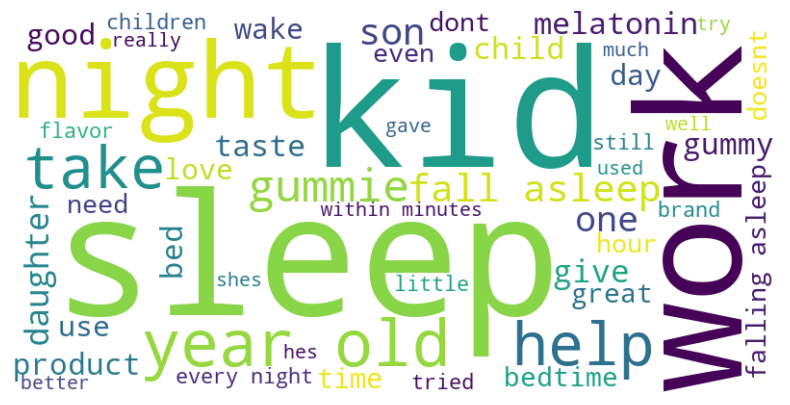

In [54]:
# Ploting wordcloud of most frequent words in review_text column - Kids
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(" ".join(kids_df_copy['review_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

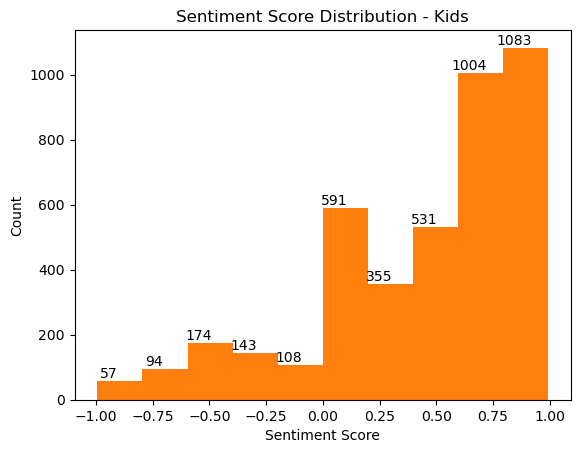

In [55]:
# Plotting histogram of sentiment scores - Kids

plt.hist(kids_df_copy['sentiment_score'])
plt.title('Sentiment Score Distribution - Kids')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
counts, bins, patches = plt.hist(kids_df_copy['sentiment_score'])
for i in range(len(patches)):
    plt.text(x=bins[i]+0.05, y=counts[i]+10, s=int(counts[i]), ha='center')
plt.show()

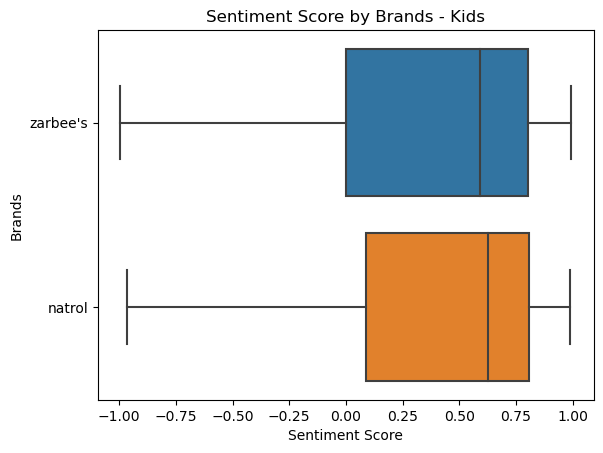

In [56]:
# Plotting boxplot of sentiment scores by brands

sns.boxplot(x=kids_df_copy['sentiment_score'], y=kids_df_copy['brand'])
plt.title('Sentiment Score by Brands - Kids')
plt.xlabel('Sentiment Score')
plt.ylabel('Brands')
plt.show()

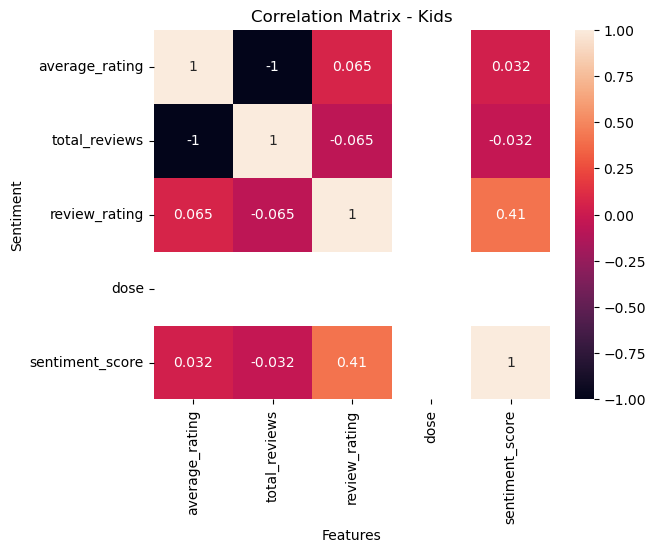

In [57]:
# Plotting a heatmap -Kids

corr_matrix = kids_df_copy.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix - Kids')
plt.xlabel('Features')
plt.ylabel('Sentiment')
plt.show()

### Sentimental Analysis : Adults

In [58]:
# Creating sentiment analyzer object
sia = SentimentIntensityAnalyzer()

# Defining stopwords to be removed
stop_words = set(stopwords.words('english'))

# Defining function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Join words back into string
    text = " ".join(words)
    return text

# Preprocess review_text column
adult_df_copy['review_text'] = adult_df_copy['review_text'].apply(preprocess_text)

In [59]:
# Create sentiment score column
adult_df_copy['sentiment_score'] = adult_df_copy['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [60]:
adult_df_copy.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,dose,sentiment_score
0,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,r+sfly,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,easy take use bought ones came ultra security ...,quick and easy,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R2C...,B07PF1SN5B,10,0.9153
1,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,grammy sammie,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,love great flavor tasty,the best gummies,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R13...,B07PF1SN5B,10,0.8519
2,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,ayasha,Unknown,verified purchase,size: 100 count (pack of 1) | style: max strength,b07pf1sn5b,https://www.amazon.com/Vitafusion-Strength-Mel...,...,love sleepy times gummies work every time coul...,great taste,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/RLN...,B07PF1SN5B,10,0.6369
3,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,escox3,Unknown,verified purchase,size: 100 count (pack of 1) | style: max strength,b07pf1sn5b,https://www.amazon.com/Vitafusion-Strength-Mel...,...,things ridiculously hard chew theyre expensive...,hard to chew,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R2N...,B07PF1SN5B,10,-0.6808
4,B07PF1SN5B,vitafusion max strength melatonin gummy supple...,4.6,5151,missjess,Unknown,verified purchase,size: 120 count (pack of 1) | style: extra str...,b00ojmzswu,https://www.amazon.com/Vitafusion-Strength-Mel...,...,mine stuck together one big blob unable return...,mine were melted together,0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07PF1S...,vitafusion,https://www.amazon.com/gp/customer-reviews/R3I...,B07PF1SN5B,10,-0.5859


### Visualization

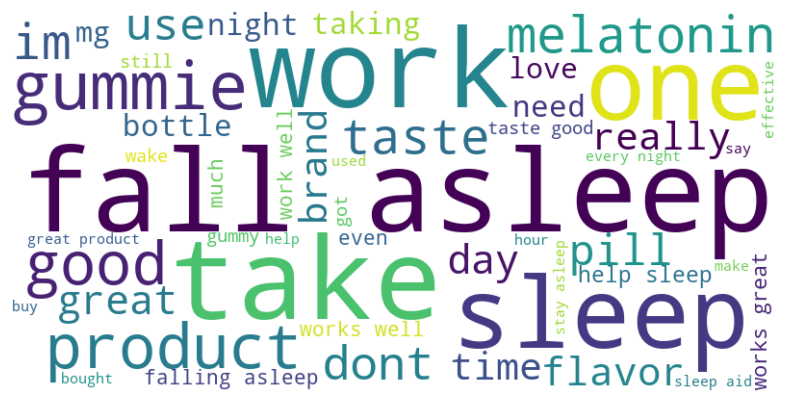

In [61]:
# Ploting wordcloud of most frequent words in review_text column - Adults
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(" ".join(adult_df_copy['review_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

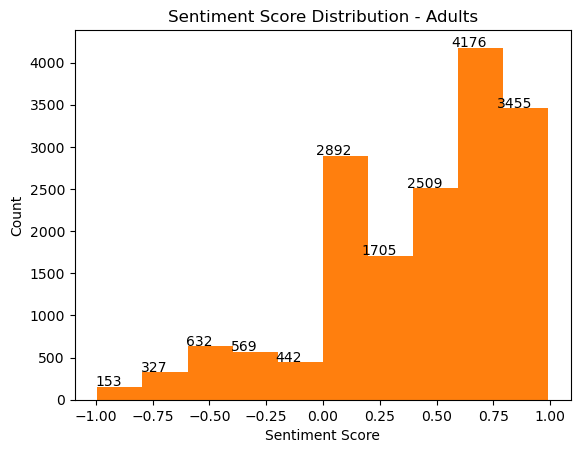

In [62]:
# Plotting histogram of sentiment scores - Adults

plt.hist(adult_df_copy['sentiment_score'])
plt.title('Sentiment Score Distribution - Adults')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
counts, bins, patches = plt.hist(adult_df_copy['sentiment_score'])
for i in range(len(patches)):
    plt.text(x=bins[i]+0.05, y=counts[i]+10, s=int(counts[i]), ha='center')
plt.show()

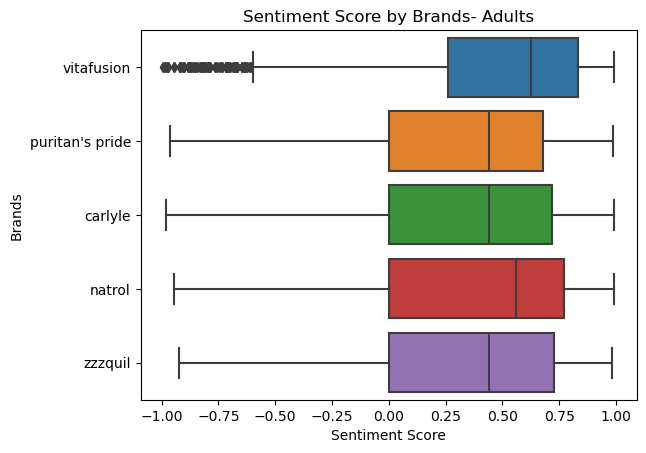

In [63]:
# Plotting boxplot of sentiment scores by brands - Adults

sns.boxplot(x=adult_df_copy['sentiment_score'], y=adult_df_copy['brand'])
plt.title('Sentiment Score by Brands- Adults')
plt.xlabel('Sentiment Score')
plt.ylabel('Brands')
plt.show()

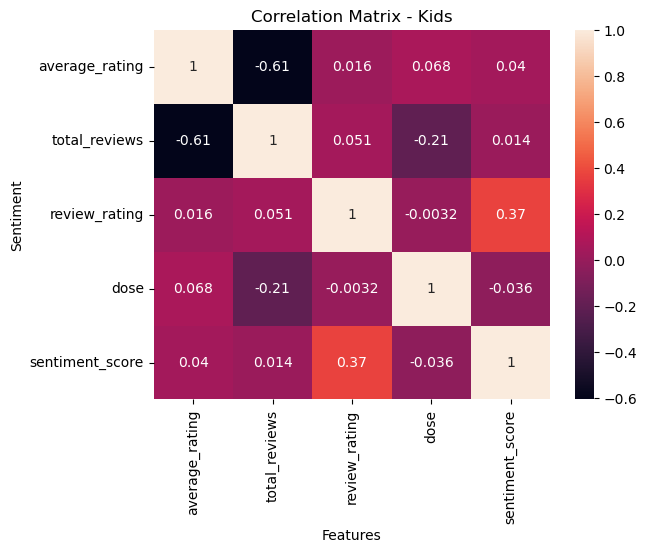

In [64]:
# Plotting a heatmap - Adults
corr_matrix = adult_df_copy.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix - Kids')
plt.xlabel('Features')
plt.ylabel('Sentiment')
plt.show()